# Evaluating a classification model
In this lecture, we will demonstrate how to evaluate a model.

## 1. Confusion matrix

Table that describes the performance of a classification model

## Agenda

- What is the purpose of **model evaluation**, and what are some common evaluation procedures?
- What is the usage of **classification accuracy**, and what are its limitations?
- How does a **confusion matrix** describe the performance of a classifier?
- What **metrics** can be computed from a confusion matrix?

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert the feature matrix into a DataFrame
iris_df = pd.DataFrame(X, columns = iris.feature_names)

# Convert string labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(iris.target_names[y])

# Add target variable (iris species) to the DataFrame
iris_df['species'] = y_encoded

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [6]:
# construct our Naive Bayes model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

model = MultinomialNB()
model.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [7]:
# make class predictions for the testing set
y_pred_class = model.predict(X_test)

In [8]:
accuracy_score(y_test, y_pred_class)

0.9555555555555556

### Let's build the Confusion Matrix

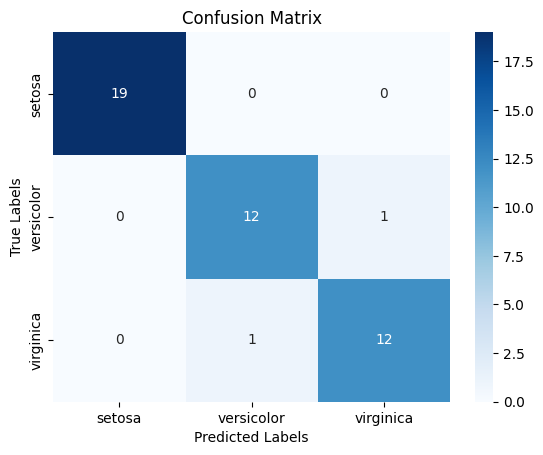

In [10]:
cm = confusion_matrix(y_test, y_pred_class)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

##  Only use virginica and versicolor as an example

In [ ]:
# print the first 25 true and predicted responses
print('True:', y_test[0:25])
print('Pred:', y_pred_class[0:25])

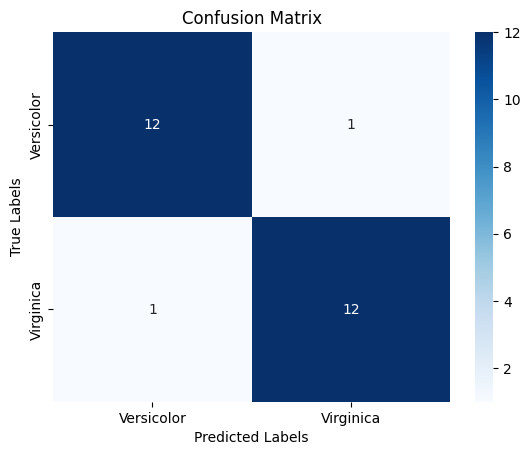

In [11]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_class, labels=[1, 2]) 
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Versicolor', 'Virginica'], yticklabels=['Versicolor', 'Virginica'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

**Basic terminology**

- **True Positives (TP):** we *correctly* predicted that they *do* have diabetes
- **True Negatives (TN):** we *correctly* predicted that they *don't* have diabetes
- **False Positives (FP):** we *incorrectly* predicted that they *do* have diabetes (a "Type I error")
- **False Negatives (FN):** we *incorrectly* predicted that they *don't* have diabetes (a "Type II error")

In [12]:
# save confusion matrix and slice into four pieces
confusion = cm

TP = cm[1, 1]  # True Positive: Virginica correctly identified as Virginica
TN = cm[0, 0]  # True Negative: Versicolor correctly identified as Versicolor
FP = cm[0, 1]  # False Positive: Versicolor incorrectly identified as Virginica
FN = cm[1, 0]  # False Negative: Virginica incorrectly identified as Versicolor


### Metrics computed from a confusion matrix
**Classification Accuracy:** Overall, how often is the classifier correct?

In [19]:
print((TP + TN) / (TP + TN + FP + FN))
indices = (y_test == 1) | (y_test == 2)
y_test_filtered = y_test[indices]
y_pred_filtered = y_pred_class[indices] 

# Now calculate the accuracy score
accuracy = accuracy_score(y_test_filtered, y_pred_filtered)
accuracy

0.9230769230769231


0.9230769230769231

**Classification Error:** Overall, how often is the classifier incorrect?

- Also known as "Misclassification Rate"

In [20]:
print((FP + FN) / (TP + TN + FP + FN))
print(1 - accuracy)

0.07692307692307693
0.07692307692307687


**Specificity:** When the actual value is negative, how often is the prediction correct?

- How "specific" (or "selective") is the classifier in predicting positive instances?

In [21]:
print(TN / (TN + FP))

0.9230769230769231


**False Positive Rate:** When the actual value is negative, how often is the prediction incorrect?

In [22]:
print(FP / (TN + FP))

0.07692307692307693


### Understanding Precision and Recall

When evaluating a classifier, especially in data mining and machine learning, we often care about **how accurate** and **how complete** our predictions are.  
That’s where **Precision** and **Recall** come in.


### Precision
**Precision** answers the question:

> "Out of all the samples the model predicted as positive, how many were actually positive?"

It focuses on **prediction quality** — how *precise* the model is when it predicts a positive class.

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

- **TP (True Positive):** Correctly predicted positive samples  
- **FP (False Positive):** Incorrectly predicted positive samples (false alarms)

*Example:*  
If a model predicts 100 aircraft as "Commercial" and 90 are actually Commercial,  
then Precision = 90 / 100 = **0.9 (90%)**


### 🔹 Recall
**Recall** (also known as **Sensitivity** or **True Positive Rate**) answers the question:

> "Out of all the actual positive samples, how many did the model correctly identify?"

It focuses on **completeness** — how *many* real positives the model managed to catch.

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

- **TP (True Positive):** Correctly predicted positive samples  
- **FN (False Negative):** Missed positive samples

 *Example:*  
If there are 100 actual "Commercial" aircraft and the model correctly finds 90 of them,  
then Recall = 90 / 100 = **0.9 (90%)**


###  Precision vs. Recall Tradeoff
There is often a **tradeoff** between Precision and Recall:
- A model with **high Precision** makes fewer false alarms but may miss some positives.
- A model with **high Recall** catches most positives but may produce more false alarms.

Choosing which one to prioritize depends on your application:
- In **fraud detection** or **medical diagnosis**, Recall is crucial.  
- In **spam detection** or **recommendation systems**, Precision might matter more.



In [23]:
# Display confusion matrix and components
print("Confusion Matrix:\n", cm)
print(f"\nTP={TP}, TN={TN}, FP={FP}, FN={FN}")

# Compute Precision and Recall
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0

print(f"\nPrecision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Confusion Matrix:
 [[12  1]
 [ 1 12]]

TP=12, TN=12, FP=1, FN=1

Precision: 0.92
Recall: 0.92


### Sklearn Version

In [24]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
precision = precision_score(y_test_filtered, y_pred_filtered)
recall = recall_score(y_test_filtered, y_pred_filtered)

print(f"\nPrecision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Precision: 0.92
Recall: 0.92


# F1-Score: Balancing Precision and Recall

## Introduction

Sometimes, Precision and Recall give **conflicting results** — one may be high while the other is low.  
To combine both into a single metric, we use the **F1-score**.

The **F1-score** is the **harmonic mean** of Precision and Recall,  
giving equal importance to both.

$$
\text{F1-score} = 2 \times \frac{(\text{Precision} \times \text{Recall})}{(\text{Precision} + \text{Recall})}
$$

### Why Harmonic Mean?

The harmonic mean punishes extreme values more than the arithmetic mean.  
If either Precision or Recall is very low, the F1-score will also be low.  

This makes it ideal for **imbalanced datasets** —  
for example, detecting rare aircraft failures or rare fraudulent transactions.


### Example:

| Metric | Value |
|:-------|------:|
| Precision | 0.9 |
| Recall | 0.6 |
| F1-score | \( 2 × (0.9 × 0.6) / (0.9 + 0.6) = 0.72 \) |

The F1-score = **0.72**, showing a balance between the two metrics.



In [25]:
# Compute F1-score manually
f1_score_manual = 2 * (precision * recall) / (precision + recall)

print("Confusion Matrix:\n", cm)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score (manual): {f1_score_manual:.2f}")

Confusion Matrix:
 [[12  1]
 [ 1 12]]
Precision: 0.92
Recall: 0.92
F1-score (manual): 0.92


In [26]:
from sklearn.metrics import f1_score, classification_report

# F1-score using sklearn
f1 = f1_score(y_test_filtered, y_pred_filtered, pos_label=1)

print(f"F1-score (sklearn): {f1:.2f}")

# Full report
print("\nClassification Report:")
print(classification_report(y_test_filtered, y_pred_filtered))

F1-score (sklearn): 0.92

Classification Report:
              precision    recall  f1-score   support

           1       0.92      0.92      0.92        13
           2       0.92      0.92      0.92        13

    accuracy                           0.92        26
   macro avg       0.92      0.92      0.92        26
weighted avg       0.92      0.92      0.92        26



## 2. Cross-Validation

## Model evaluation procedures

1. **Training and testing on the same data**
    - Rewards overly complex models that "overfit" the training data and won't necessarily generalize
2. **Train/test split**
    - Split the dataset into two pieces, so that the model can be trained and tested on different data
    - Better estimate of out-of-sample performance, but still a "high variance" estimate
    - Useful due to its speed, simplicity, and flexibility
3. **K-fold cross-validation**
    - Systematically create "K" train/test splits and average the results together
    - Even better estimate of out-of-sample performance
    - Runs "K" times slower than train/test split

In [27]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [28]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [31]:
from sklearn.neighbors import KNeighborsClassifier
# use train/test split with different random_state values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

# check classification accuracy of KNN with K=5
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9736842105263158


### Steps for K-fold cross-validation
1. Split the dataset into K **equal** partitions (or "folds").
2. Use fold 1 as the **testing set** and the union of the other folds as the **training set**.
3. Calculate **testing accuracy**.
4. Repeat steps 2 and 3 K times, using a **different fold** as the testing set each time.
5. Use the **average testing accuracy** as the estimate of out-of-sample accuracy.

In [32]:
# simulate splitting a dataset of 25 observations into 5 folds
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=False).split(range(25))

# print the contents of each training and testing set
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(iteration, data[0], str(data[1])))

Iteration                   Training set observations                   Testing set observations
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


- Dataset contains **25 observations** (numbered 0 through 24)
- 5-fold cross-validation, thus it runs for **5 iterations**
- For each iteration, every observation is either in the training set or the testing set, **but not both**
- Every observation is in the testing set **exactly once**

## Comparing cross-validation to train/test split
Advantages of **cross-validation:**

- More accurate estimate of out-of-sample accuracy
- More "efficient" use of data (every observation is used for both training and testing)

Advantages of **train/test split:**

- Runs K times faster than K-fold cross-validation
- Simpler to examine the detailed results of the testing process

### Cross-validation recommendations
1. K can be any number, but **K=10** is generally recommended
2. For classification problems, **stratified sampling** is recommended for creating the folds
    - Each response class should be represented with equal proportions in each of the K folds
    - scikit-learn's `cross_val_score` function does this by default

In [33]:
from sklearn.model_selection import cross_val_score
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print(scores)

[0.96666667 1.         0.93333333 0.96666667 1.        ]


In [34]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.9733333333333334


In [35]:
# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[np.float64(0.96), np.float64(0.9533333333333334), np.float64(0.9666666666666666), np.float64(0.9666666666666666), np.float64(0.9666666666666668), np.float64(0.9666666666666668), np.float64(0.9666666666666668), np.float64(0.9666666666666668), np.float64(0.9733333333333334), np.float64(0.9666666666666668), np.float64(0.9666666666666668), np.float64(0.9733333333333334), np.float64(0.9800000000000001), np.float64(0.9733333333333334), np.float64(0.9733333333333334), np.float64(0.9733333333333334), np.float64(0.9733333333333334), np.float64(0.9800000000000001), np.float64(0.9733333333333334), np.float64(0.9800000000000001), np.float64(0.9666666666666666), np.float64(0.9666666666666666), np.float64(0.9733333333333334), np.float64(0.96), np.float64(0.9666666666666666), np.float64(0.96), np.float64(0.9666666666666666), np.float64(0.9533333333333334), np.float64(0.9533333333333334), np.float64(0.9533333333333334)]


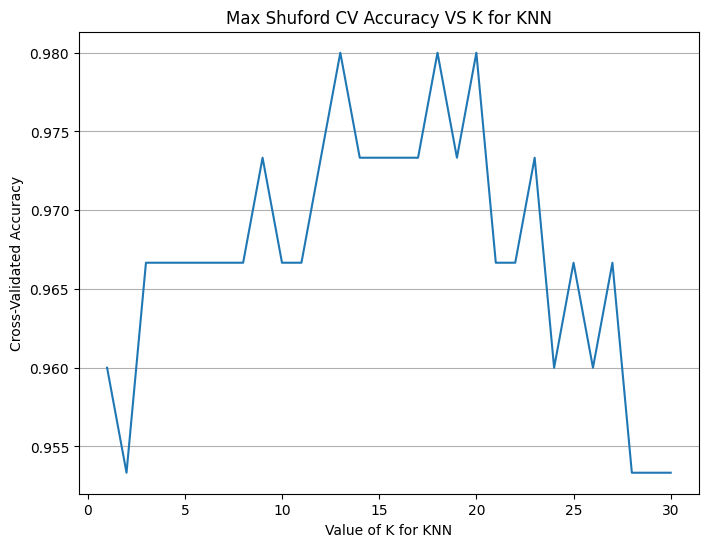

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
#Please add your name on the title
plt.figure(figsize=(8,6))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Max Shuford CV Accuracy VS K for KNN')
plt.grid(axis='y')

plt.show()

# Confusion Matrix Practice – From Scratch vs. Scikit-learn

### Objective
In this exercise, you will understand how a **confusion matrix** works and how to calculate the key evaluation metrics **manually** and using **scikit-learn**.

You will:
- Compute **Accuracy**, **Precision**, **Recall**, and **F1-Score** from scratch.  
- Verify your results using built-in `scikit-learn` functions.  
- Visualize the confusion matrix with Seaborn.


## Dataset

The following data represent predictions from a model that classifies aircraft as **Commercial (1)** or **Private (0)**.


In [ ]:
import numpy as np

# True labels (1 = Commercial, 0 = Private)
y_true = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0])

# Predicted labels
y_pred = np.array([1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0])



## Part 1 — Compute Manually (From Scratch)

**Instructions:**
1. Write Python code to manually calculate:
   - True Positives (TP)
   - True Negatives (TN)
   - False Positives (FP)
   - False Negatives (FN)
2. Compute the following metrics:
   - Accuracy = (TP + TN) / (TP + TN + FP + FN)
   - Precision = TP / (TP + FP)
   - Recall = TP / (TP + FN)
   - F1 Score = 2 × (Precision × Recall) / (Precision + Recall)
3. Display the confusion matrix clearly as a 2×2 structure.


In [ ]:
#Your code:


## Part 2 — Verify with Scikit-learn

**Instructions:**
1. Use the scikit-learn functions below to confirm your manual results.
2. Then visualize your confusion matrix using Seaborn.

**Functions to use:**
- `confusion_matrix()`
- `accuracy_score()`
- `precision_score()`
- `recall_score()`
- `f1_score()`


In [ ]:
#Your code:
